In [1]:
import pandas as pd

In [2]:
df = pd.DataFrame(pd.read_csv("/content/student.csv"))
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


**Preparing X and Y variables**

In [3]:

X = df.drop(columns=['math_score'],axis=1)

In [4]:
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [5]:
print("Categories in 'gender' variable:     ",end=" " )
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable:  ",end=" ")
print(df['race_ethnicity'].unique())

print("Categories in'parental level of education' variable:",end=" " )
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable:     ",end=" " )
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:     ",end=" " )
print(df['test_preparation_course'].unique())

Categories in 'gender' variable:      ['female' 'male']
Categories in 'race_ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:      ['standard' 'free/reduced']
Categories in 'test preparation course' variable:      ['none' 'completed']


In [6]:
y = df['math_score']

In [7]:
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math_score, Length: 1000, dtype: int64

# Column Transformer

In [8]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns # here we have taken all the numerical features excluding any object tupe
cat_features = X.select_dtypes(include="object").columns # here we have taken all the categorical features including any object type

from sklearn.preprocessing import OneHotEncoder, StandardScaler # coloumns transformer is actually combining OneHotEncoder and StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler() #initialized StandardScaler
oh_transformer = OneHotEncoder() # initialized OneHotEncoder

preprocessor = ColumnTransformer( #responsible for transforming your datapoints or columns
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features), # StandardScaler is happening by using this numeric_transformer and this will be applied only for  num_features
    ]
)

In [9]:
X = preprocessor.fit_transform(X)

In [10]:
X.shape

(1000, 19)

# TRAIN TEST SPLIT

In [11]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape # 800 records are there in training and 200 records in my test

((800, 19), (200, 19))

In [12]:
from sklearn.impute import SimpleImputer # Missing values
from sklearn.preprocessing import StandardScaler # Feature scaling
from sklearn.preprocessing import OrdinalEncoder # To rank categorical features
# Pipeline
from sklearn.pipeline import Pipeline #To add everything together
from sklearn.compose import ColumnTransformer # Combine everything together

In [24]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
import warnings

In [15]:
regression = LinearRegression()
regression.fit(X_train, y_train)

LinearRegression()

In [16]:
regression.coef_

array([-6.53244193,  6.53244193, -0.80262367, -0.44330087, -1.42824083,
       -1.41585991,  4.09002528, -0.09454143, -0.81144256,  0.83477083,
       -1.49503027,  0.90431471,  0.66192873, -1.75503744,  1.75503744,
       -1.64482118,  1.64482118,  3.44425129, 10.99840031])

In [17]:
regression.intercept_

65.52357656600951

In [20]:
import numpy as np
def model_evaluation(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [26]:
models={
    'LinearRegression':LinearRegression(),
    'Lasso':Lasso(),
    'Ridge':Ridge(),
    'Elasticnet':ElasticNet()
}
model_list=[]
r2_list=[]

for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,y_train)

    #Make Predictions
    y_pred=model.predict(X_test)

    mae, rmse, r2_square=model_evaluation(y_test,y_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])


    print('Model Training Performance')
    print("RMSE:",rmse)
    print("MAE:",mae)
    print("R2 score",r2_square*100)

    r2_list.append(r2_square)

    print('*'*35)
    print('\n')

LinearRegression
Model Training Performance
RMSE: 5.393993869732844
MAE: 4.214763142474852
R2 score 88.04332983749565
***********************************


Lasso
Model Training Performance
RMSE: 6.519694535667419
MAE: 5.157881810347763
R2 score 82.53197323627853
***********************************


Ridge
Model Training Performance
RMSE: 5.39038701693564
MAE: 4.211100688014261
R2 score 88.05931485028738
***********************************


Elasticnet
Model Training Performance
RMSE: 7.959862835613772
MAE: 6.390111785692222
R2 score 73.96242583916663
***********************************




In [36]:
pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 9.5 MB/s eta 0:00:00


In [37]:
from catboost import CatBoostRegressor

In [38]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(),
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)


    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')

    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)

    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 5.3231
- Mean Absolute Error: 4.2667
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3940
- Mean Absolute Error: 4.2148
- R2 Score: 0.8804


Lasso
Model performance for Training set
- Root Mean Squared Error: 6.5938
- Mean Absolute Error: 5.2063
- R2 Score: 0.8071
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.5197
- Mean Absolute Error: 5.1579
- R2 Score: 0.8253


Ridge
Model performance for Training set
- Root Mean Squared Error: 5.3233
- Mean Absolute Error: 4.2650
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3904
- Mean Absolute Error: 4.2111
- R2 Score: 0.8806


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 5.7091
- Mean Absolute Error: 4.5175
- R2 Score: 0.8554
-----------------------

# Results

In [27]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
2,Ridge,0.880593
0,LinearRegression,0.880433
1,Lasso,0.825320
3,Elasticnet,0.739624


# Linear Regression

In [28]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 88.04


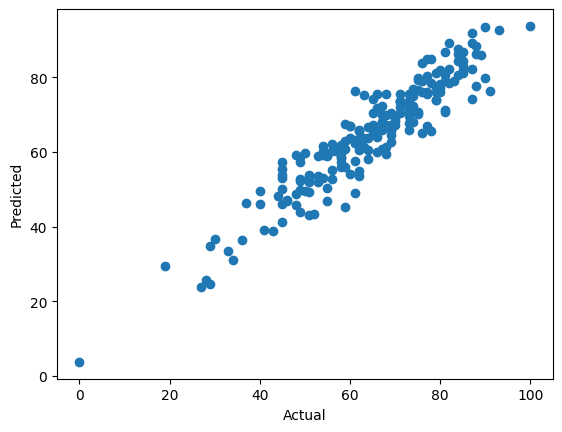

In [29]:
plt.scatter(y_test,y_pred); # Plot y_pred and y_test
plt.xlabel('Actual');
plt.ylabel('Predicted');

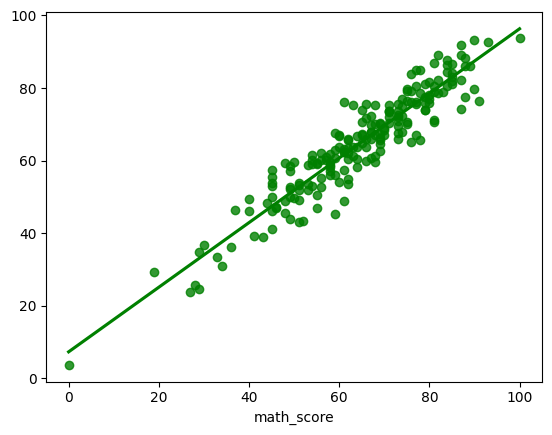

In [31]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='green');

In [33]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df # Difference between Actual and Predicted Values

,Actual Value,Predicted Value,Difference
521,91,76.387970,14.612030
737,53,58.885970,-5.885970
740,80,76.990265,3.009735
660,74,76.851804,-2.851804
411,84,87.627378,-3.627378
...,...,...,...
408,52,43.409149,8.590851
332,62,62.152214,-0.152214
208,74,67.888395,6.111605
613,65,67.022287,-2.022287
